# Entrenamiento fold 1

In [18]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Se optó por construir los folds previamente utilizando Weka utilzando un filtro que nos garantiza que estos fueron construidos con un proceso de muestreo samplificado

In [20]:
# Abrimos los .csv del fold

# Fold 1
training_set_1 = pd.read_csv("./fold_1/training_shuffled.csv")
test_set_1 = pd.read_csv("./fold_1/test_shuffled.csv")


In [21]:
# Variables en común usadas en todos los entrenamientos

# Número de instancias por pliegue. Todos los folds tienen un número igual
# de instancias positivas y negativas.
attributes = training_set_1.columns[:-1]
class_attribute = training_set_1.columns[-1]
class_attribute_name = training_set_1[training_set_1.columns[-1]].drop_duplicates()

positive_count, negative_count = training_set_1.groupby([class_attribute])[class_attribute].count()


print(attributes)
print(class_attribute)
print(class_attribute_name)
print(positive_count)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')
class
0    tested_positive
1    tested_negative
Name: class, dtype: object
533


## Entrenamiento con fold 1

### Exploración de número de neuronas

In [23]:
from sklearn.neural_network import MLPClassifier

last_expermient_no = 0 # Número del último experimento conducido
init_neurons = (len(attributes)+len(class_attribute_name)) // 2
hidden_layer_sizes = (init_neurons) # Número de neuronas/capas
epochs = 1
learning_rate = 0
momentum = 0


results = []

for neurons_count in range(init_neurons, (init_neurons*2) + 1, 1):
    print(f"================{neurons_count} neurons===================")
    hidden_layer_sizes = (neurons_count) 
    clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=98041)


    #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
    train_attribute_values = training_set_1[attributes]
    train_class_values = training_set_1[class_attribute]

    test_attribute_values = test_set_1[attributes]
    test_class_values = test_set_1[class_attribute]

    ################## Modelo ###########################
    model = clasificador.fit(train_attribute_values, train_class_values)
    ################## Clasificar  #################
    predict = model.predict(test_attribute_values)
    ############ Evaluar ###############################
    report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
    report = classification_report(test_class_values, predict, labels=class_attribute_name)
    # record training set accuracy and error
    training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
    training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
    # record generalization accuracy and error
    test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
    test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
    #print(report)
    print(f"acc={report_dict['accuracy']}")
    print(f"training_accuracy = {training_accuracy}")
    print(f"test_accuracy = {test_accuracy}")
    #last_expermient_no += 1
    #results.append([])


# Escribir los resultados a un .csv para llevar record de los expermientos
#experiments_fold_1 = pd.read_csv('experiments_fold_1.csv')
#for result in results:
#    experiments_fold_1.loc[len(experiments_fold_1)] = result
#experiments_fold_1.to_csv('experiments_fold_1.csv', index=False)


================5 neurons===================
acc=0.6685393258426966
training_accuracy = 0.6716697936210131
test_accuracy = 0.6685393258426966
================6 neurons===================
acc=0.5243445692883895
training_accuracy = 0.5562851782363978
test_accuracy = 0.5243445692883895
================7 neurons===================
acc=0.6872659176029963
training_accuracy = 0.7054409005628518
test_accuracy = 0.6872659176029963
================8 neurons===================
acc=0.6910112359550562
training_accuracy = 0.6810506566604128
test_accuracy = 0.6910112359550562
================9 neurons===================
acc=0.7284644194756554
training_accuracy = 0.7213883677298312
test_accuracy = 0.7284644194756554
================10 neurons===================
acc=0.7415730337078652
training_accuracy = 0.7373358348968105
test_accuracy = 0.7415730337078652


De los resultados previamente obtenidos, nos podemos percatar que con 9 neuronas se obtiene el mejor
resultado puesto a que nos da el mejor accuracy sin que haya una disparidad muy grande entre el acc
con respecto al test y el acc con respecto al training

### Experimentación número de capas ocultas

In [24]:
last_expermient_no = 0 # Número del último experimento conducido
epochs = 1
learning_rate = 0
momentum = 0

results = []

hidden_layer_sizes = []

for _ in range(1, 6, 1):
    hidden_layer_sizes.append(9)
    print(f"================layers = {hidden_layer_sizes}===================")
    clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=98041)


    #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
    train_attribute_values = training_set_1[attributes]
    train_class_values = training_set_1[class_attribute]

    test_attribute_values = test_set_1[attributes]
    test_class_values = test_set_1[class_attribute]

    ################## Modelo ###########################
    model = clasificador.fit(train_attribute_values, train_class_values)
    ################## Clasificar  #################
    predict = model.predict(test_attribute_values)
    ############ Evaluar ###############################
    report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
    report = classification_report(test_class_values, predict, labels=class_attribute_name)
    # record training set accuracy and error
    training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
    training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
    # record generalization accuracy and error
    test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
    test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
    #print(report)
    print(f"acc={report_dict['accuracy']}")
    print(f"training_accuracy = {training_accuracy}")
    print(f"test_accuracy = {test_accuracy}")


================layers = [9]===================
acc=0.7284644194756554
training_accuracy = 0.7213883677298312
test_accuracy = 0.7284644194756554
================layers = [9, 9]===================
acc=0.7359550561797753
training_accuracy = 0.7382739212007504
test_accuracy = 0.7359550561797753
================layers = [9, 9, 9]===================
acc=0.6797752808988764
training_accuracy = 0.6697936210131332
test_accuracy = 0.6797752808988764
================layers = [9, 9, 9, 9]===================
acc=0.7471910112359551
training_accuracy = 0.7382739212007504
test_accuracy = 0.7471910112359551
================layers = [9, 9, 9, 9, 9]===================
acc=0.7808988764044944
training_accuracy = 0.797373358348968
test_accuracy = 0.7808988764044944


Es menos claro aquí cuál es el número óptimo de capaz ocultas. Por un lado, con una sola capa se obtiene la mejor relación entre el acc sobre el test y sobre el training, pero por el otro quizás una sola capa no nos de la expresividad requerida por el comportamiento de nuestros datos.

Para descartar dudas a través de experimentación, tomaré las topologías que tienen de 3 y 4 capas ocultas
y sobre ellas experimentaré con el número de épocas.

### Experimentación número de épocas

################## layers = [9] ########################
---------------------- epochs = 10 -----------------------
acc=0.6086142322097379
---------------------- epochs = 15 -----------------------
acc=0.6460674157303371
---------------------- epochs = 20 -----------------------
acc=0.6441947565543071
---------------------- epochs = 25 -----------------------
acc=0.6797752808988764
---------------------- epochs = 30 -----------------------
acc=0.6891385767790262
---------------------- epochs = 35 -----------------------
acc=0.6966292134831461
---------------------- epochs = 40 -----------------------
acc=0.7116104868913857
---------------------- epochs = 45 -----------------------
acc=0.7097378277153558
---------------------- epochs = 50 -----------------------
acc=0.704119850187266
---------------------- epochs = 55 -----------------------
acc=0.7078651685393258
---------------------- epochs = 60 -----------------------
acc=0.7247191011235955
---------------------- epochs = 65 -------

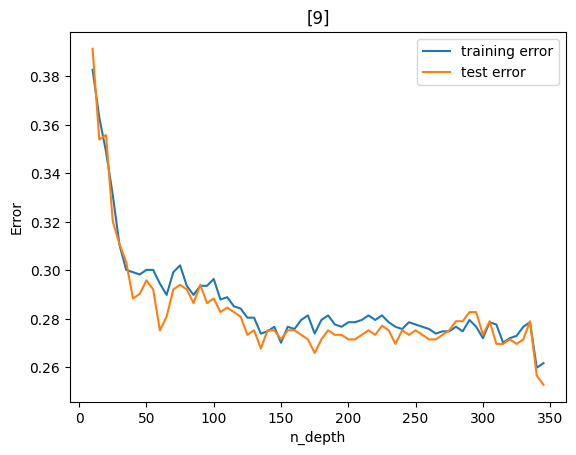

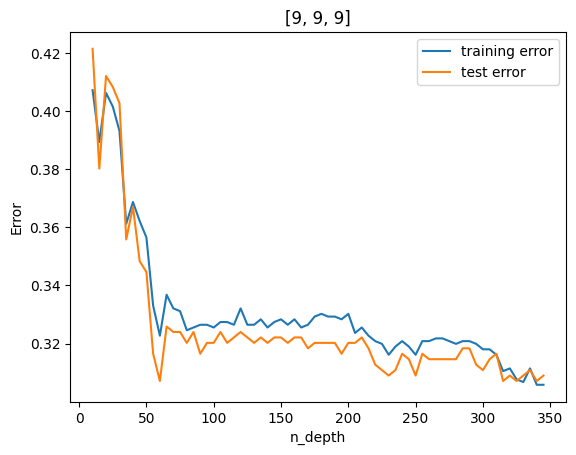

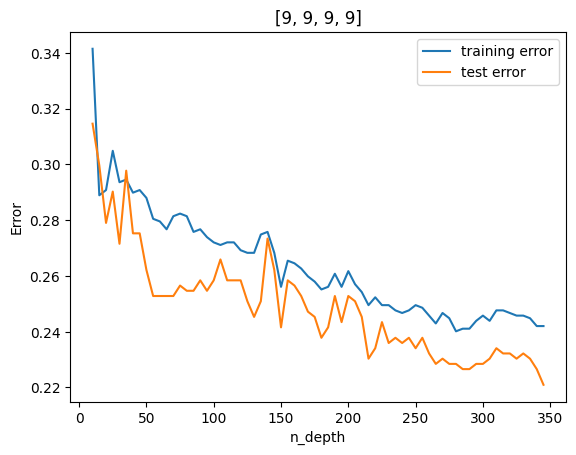

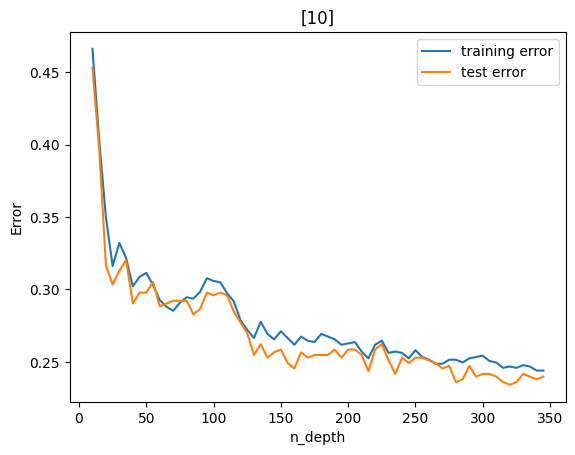

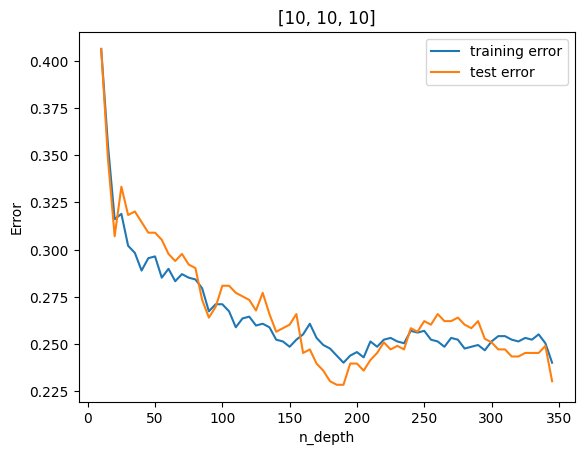

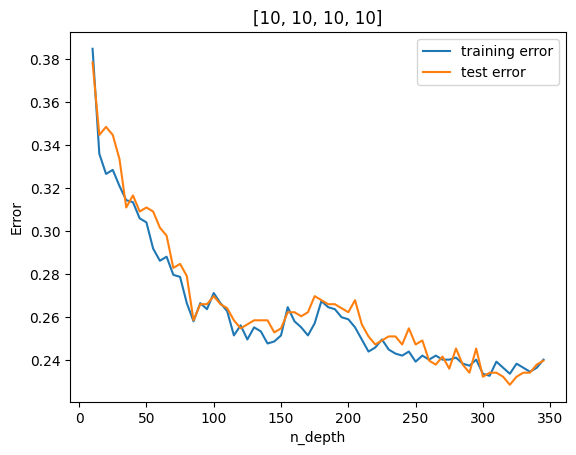

In [27]:
import matplotlib.pyplot as plt

last_expermient_no = 0 # Número del último experimento conducido
learning_rate = 0
momentum = 0

results = []

# se probaron estas topologías inicialmente: [[8], [8,8,8], [8, 8, 8, 8]]
topologies = [[9], [9,9,9], [9, 9, 9, 9], [10], [10,10,10], [10,10,10,10]] 
epochs = range(10, 350, 5) # La granulaidad fue cambiando conforme la experimentación

for topology in topologies:
    print(f"################## layers = {topology} ########################")
    
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []
    
    for epoch in epochs:
        print(f"---------------------- epochs = {epoch} -----------------------")
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=topology,
                        max_iter = epoch,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set_1[attributes]
        train_class_values = training_set_1[class_attribute]

        test_attribute_values = test_set_1[attributes]
        test_class_values = test_set_1[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)

        training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
        training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))

        test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
        test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
        print(f"acc={report_dict['accuracy']}")

    plt.figure()
    plt.title(str(topology))
    plt.plot(epochs, training_error, label="training error")
    plt.plot(epochs, test_error, label="test error")
    plt.ylabel("Error")
    plt.xlabel("n_depth")
    plt.legend()

### Reportes de experimentos conforme su granularidad:


1. range(10, 350, 5)
3. range(150, 550, 1)

A partir de esta serie de experimentos, identifiqué que el overfitting se da a partir, aproximadamente, del
uso de 185 épocas. Entonces, los siguientes experimentos se harán con esta cifra como máximo número de épocas.


### Experimentos variando learning rate y momentum

NOTA: MLPClassifier ignora los parámetros de learning rate y momentum
cuando se usa el solver lbfgs. Cambié momentariamente a sgd para probar si de esta
forma mejoraba el performance con sgd, pero como se puede observar, no fue el caso.

================LR: 0.1 mom=0.3=======================
New best acc: 0.5450281425891182 with 10 epochs
New best acc: 0.5469043151969981 with 15 epochs
================LR: 0.1 mom=0.6=======================
New best acc: 0.5150093808630394 with 10 epochs
================LR: 0.1 mom=0.9=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.3=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.6=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.9=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.3=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.6=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.9=======================
New best acc: 0.5 with 10 epochs


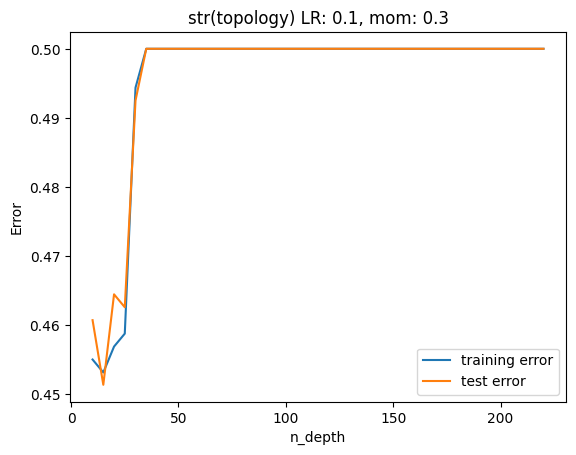

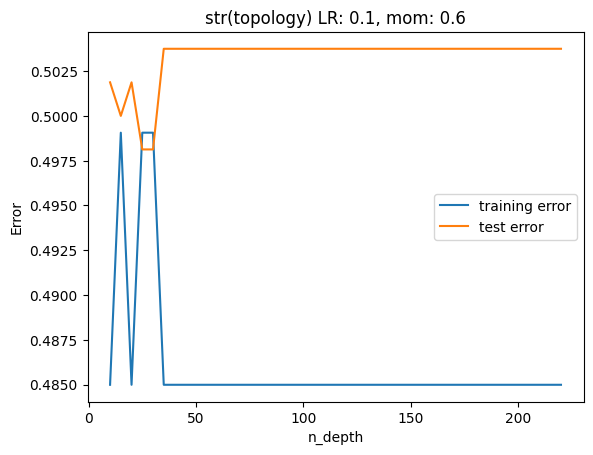

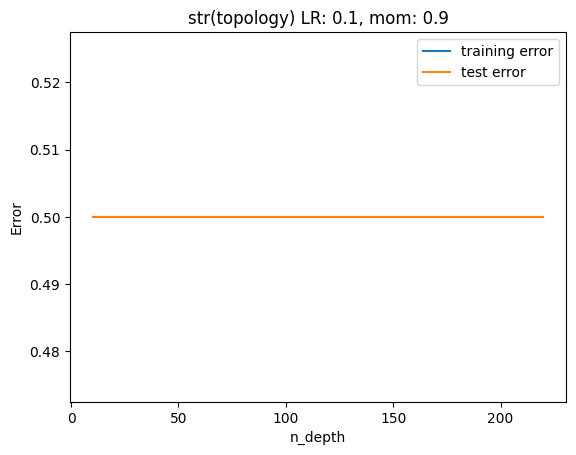

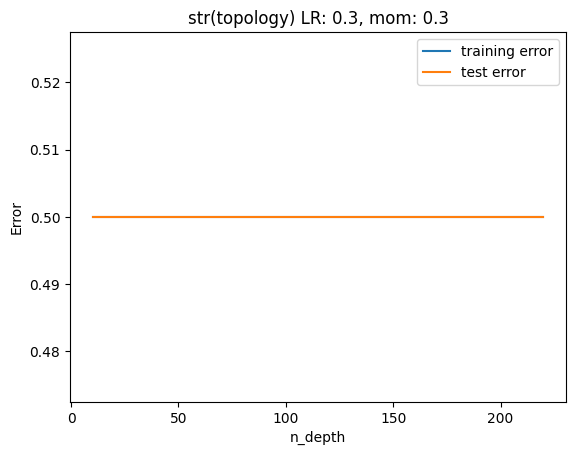

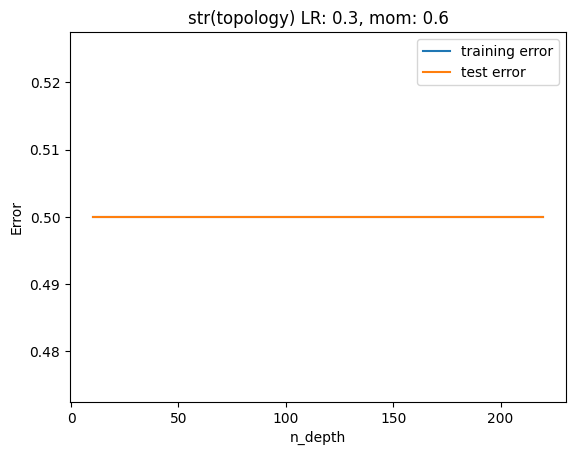

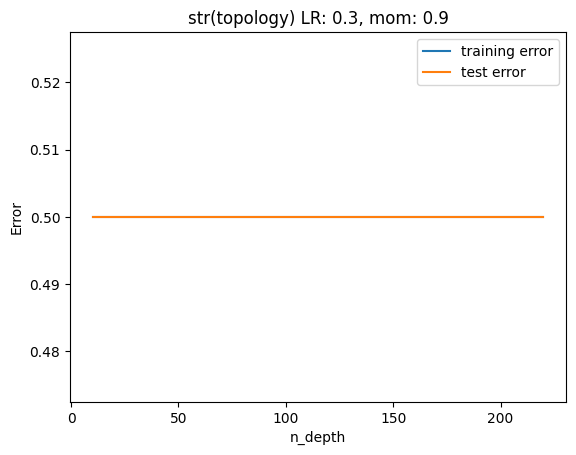

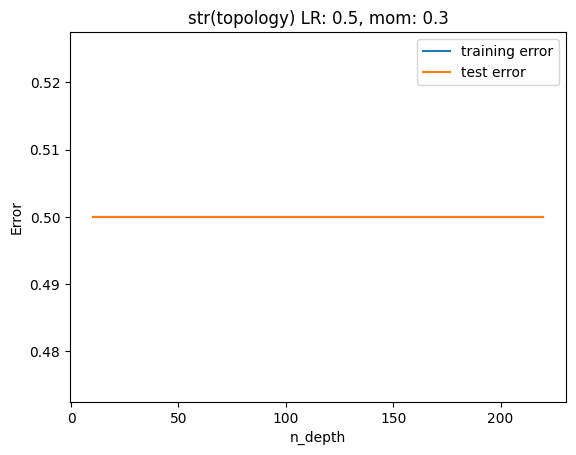

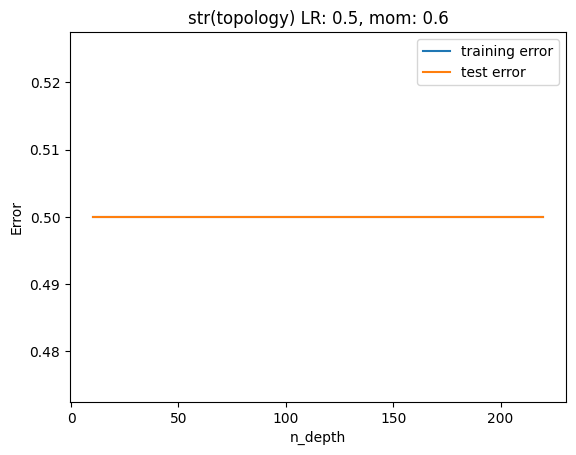

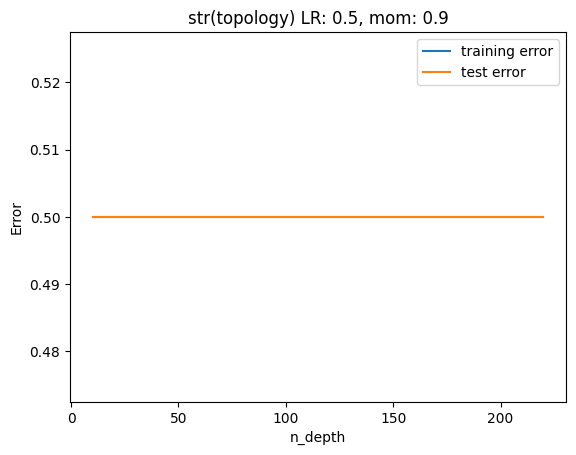

In [11]:
last_expermient_no = 0 # Número del último experimento conducido

# se probaron estas topologías inicialmente: [[8], [8,8,8], [8, 8, 8, 8]]
# Epochs ideal 185
epochs = range(10, 225, 5) # añado un pequeño margen para comprobar que si se entra en overfitting

learning_rate_range = range(1,7,2)
momentum_range = range(3,11,3)

for _lr in learning_rate_range:
    lr = _lr / 10.0
    for _momentum in momentum_range:
        best_acc = -1
        momentum = _momentum / 10.0 if _momentum != 0 else 0
        print(f"================LR: {lr} mom={momentum}=======================")
        training_accuracy = []
        test_accuracy = []
        training_error = []
        test_error = []
        for epoch in epochs:
            clasificador = MLPClassifier(solver='sgd', 
                        hidden_layer_sizes=[8,8,8],
                        max_iter = epoch,
                        random_state=98041,
                        learning_rate_init=lr,
                        momentum=momentum
                        )
            #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
            train_attribute_values = training_set_1[attributes]
            train_class_values = training_set_1[class_attribute]
            test_attribute_values = test_set_1[attributes]
            test_class_values = test_set_1[class_attribute]
            ################## Modelo ###########################
            model = clasificador.fit(train_attribute_values, train_class_values)
            ################## Clasificar  #################
            predict = model.predict(test_attribute_values)
            ############ Evaluar ###############################
            report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
            report = classification_report(test_class_values, predict, labels=class_attribute_name)
            training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
            if training_accuracy[-1] > best_acc:
                print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
                best_acc = training_accuracy[-1]

            training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))
            test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
            test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
            # print(f"acc={report_dict['accuracy']}")
        plt.figure()
        title = f"{str(topology)} LR: {lr}, mom: {momentum}"
        plt.title(title)
        plt.plot(epochs, training_error, label="training error")
        plt.plot(epochs, test_error, label="test error")
        plt.ylabel("Error")
        plt.xlabel("n_depth")
        plt.legend()

## Parámetros escogidos

Después de experimentar, los parámetros que me dieron mejores resultados fueron:

- solver = 'lbfgs'
- topología = [8, 8, 8]
- épocas = 185
- learning rate = N/A
- momentum = N/A


In [16]:

clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=[8,8,8],
                    max_iter = 185,
                    random_state=98041,
)
#A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
train_attribute_values = training_set_1[attributes]
train_class_values = training_set_1[class_attribute]
test_attribute_values = test_set_1[attributes]
test_class_values = test_set_1[class_attribute]
################## Modelo ###########################
model = clasificador.fit(train_attribute_values, train_class_values)
################## Clasificar  #################
predict = model.predict(test_attribute_values)
############ Evaluar ###############################
report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
acc = report_dict["accuracy"]
report = classification_report(test_class_values, predict, labels=class_attribute_name)

print(f"accuracy exacto: {acc}")
print(report)


accuracy exacto: 0.7322097378277154
                 precision    recall  f1-score   support

tested_positive       0.72      0.75      0.74       267
tested_negative       0.74      0.72      0.73       267

       accuracy                           0.73       534
      macro avg       0.73      0.73      0.73       534
   weighted avg       0.73      0.73      0.73       534

